# 1. Introduction

In this project, the question I am to answer is to build a model to predict whether the loan would be approved based on the real data of bank. The reason I care about the question is that in modern days we all care about our credit and loan status especially when we need to buy something like house. There have been lots of previous papers in the economics literature addressing this question, both in theoreitical and applied research. Hamid, Aboobyda Jafar, and Tarig Mohammed Ahmed(2016) developed models using  j48, bayesNet and naiveBayes to predict the loan status risk of banks. Kumar Arun, Garg Ishan, Kaur Sanmeet(2016) analyzed the process and methodology in this topic. Suliman Mohamed Fati(2021) examined three models including Logistic Regression, Decision Tree, and Random Forest to predict Loan Status Approval. The above and other similar papers give the project insights and guidelines.

# 2. Data

The data was found on Kaggle, the specific link of the data set is https://www.kaggle.com/datasets/shaimaa1234/loan-prediction-numerical-values. The reason I choose this dataset is for the purpose of building prediction models of interest, and more important,  there is no public code available for this dataset(until May, 2022), then I can really check my understanding and mastering of the techniques. 
The data cleansing and prepossessing before modelling is necessary. I removed the first column which is the index and changed the type of data, from string and numerical value to categorical value, the variables are Dependents, Credit_History, Gender, Married, Graduate, Rural, Semiurban, Urban and Loan_Status. To get a better model, I scaled the data so that they are normally distributed, and the data is imbalanced since the two states of loan status have much difference, I added randomized samples to the data. Also, comprehensive summary statistics of the variables are shown and visually presented. The correlation analysis shows the credit history is the most relevant variable to loan status.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_excel('Loan_Prediction.xlsx')

In [3]:
df.head()

,Unnamed: 0,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Graduate,Rural,Semiurban,Urban,Loan_Status
0,0,0,5849,0.0,146.412162,360,1,0,1,1,0,0,1,0
1,1,1,4583,1508.0,128.000000,360,1,0,0,1,1,0,0,1
2,2,0,3000,0.0,66.000000,360,1,0,0,1,0,0,1,0
3,3,0,2583,2358.0,120.000000,360,1,0,0,0,0,0,1,0
4,4,0,6000,0.0,141.000000,360,1,0,1,1,0,0,1,0


In [4]:
df = df.iloc[: , 1:]
df.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Graduate,Rural,Semiurban,Urban,Loan_Status
0,0,5849,0.0,146.412162,360,1,0,1,1,0,0,1,0
1,1,4583,1508.0,128.000000,360,1,0,0,1,1,0,0,1
2,0,3000,0.0,66.000000,360,1,0,0,1,0,0,1,0
3,0,2583,2358.0,120.000000,360,1,0,0,0,0,0,1,0
4,0,6000,0.0,141.000000,360,1,0,1,1,0,0,1,0


In [5]:
df['Dependents'] = pd.to_numeric(df['Dependents'],errors='coerce')
df = df.replace(np.nan, 3, regex=True)
print (df.dtypes)

Dependents           float64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term       int64
Credit_History         int64
Gender                 int64
Married                int64
Graduate               int64
Rural                  int64
Semiurban              int64
Urban                  int64
Loan_Status            int64
dtype: object


In [6]:
df['Loan_Status'].value_counts()

0    406
1    180
Name: Loan_Status, dtype: int64

In [7]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Graduate,Rural,Semiurban,Urban,Loan_Status
count,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000
mean,0.773038,5439.547782,1637.462321,147.403145,341.672355,0.866894,0.180887,0.348123,0.788396,0.295222,0.383959,0.320819,0.307167
std,1.016794,6227.712048,2977.957012,85.605872,64.874910,0.339979,0.385254,0.476782,0.408795,0.456532,0.486764,0.467190,0.461713
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2873.750000,0.000000,101.250000,360.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3806.000000,1211.500000,130.000000,360.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,5818.750000,2281.000000,166.750000,360.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


(array([507.,  57.,  15.,   0.,   4.,   0.,   1.,   1.,   0.,   1.]),
 array([  150.,  8235., 16320., 24405., 32490., 40575., 48660., 56745.,
        64830., 72915., 81000.]),
 <a list of 10 Patch objects>)

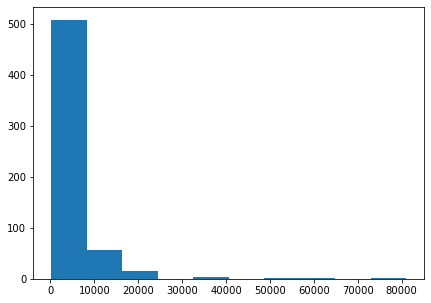

In [8]:
plt.figure(figsize=(7,5))
plt.hist(df.ApplicantIncome)

(array([ 70., 314., 135.,  33.,  15.,   6.,   5.,   3.,   3.,   2.]),
 array([  9. ,  78.1, 147.2, 216.3, 285.4, 354.5, 423.6, 492.7, 561.8,
        630.9, 700. ]),
 <a list of 10 Patch objects>)

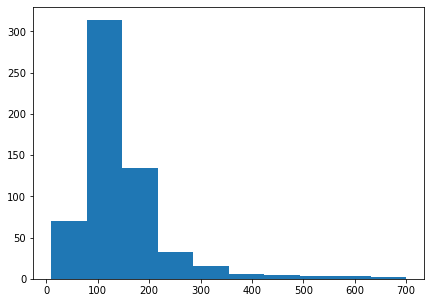

In [9]:
plt.figure(figsize=(7,5))
plt.hist(df.LoanAmount)

In [10]:
correlation = df.corr()
print(correlation['Loan_Status'])

Dependents          -0.011458
ApplicantIncome      0.009766
CoapplicantIncome    0.064902
LoanAmount           0.042339
Loan_Amount_Term     0.012268
Credit_History      -0.512266
Gender               0.023451
Married              0.095806
Graduate            -0.071649
Rural                0.104290
Semiurban           -0.137764
Urban                0.041624
Loan_Status          1.000000
Name: Loan_Status, dtype: float64


In [11]:
for col in ['Dependents', 'Credit_History', 'Gender', 'Married', 'Graduate', 'Rural', 'Semiurban', 'Urban', 'Loan_Status' ]:
    df[col] = df[col].astype('category')

In [12]:
df.describe(include='all')

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Graduate,Rural,Semiurban,Urban,Loan_Status
count,586.0,586.000000,586.000000,586.000000,586.000000,586.0,586.0,586.0,586.0,586.0,586.0,586.0,586.0
unique,4.0,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
top,0.0,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
freq,334.0,NaN,NaN,NaN,NaN,508.0,480.0,382.0,462.0,413.0,361.0,398.0,406.0
mean,NaN,5439.547782,1637.462321,147.403145,341.672355,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,6227.712048,2977.957012,85.605872,64.874910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,150.000000,0.000000,9.000000,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2873.750000,0.000000,101.250000,360.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,3806.000000,1211.500000,130.000000,360.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,5818.750000,2281.000000,166.750000,360.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Split the data 

In [13]:
X = df.drop('Loan_Status', axis = 1)
y = df['Loan_Status']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Scaling

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

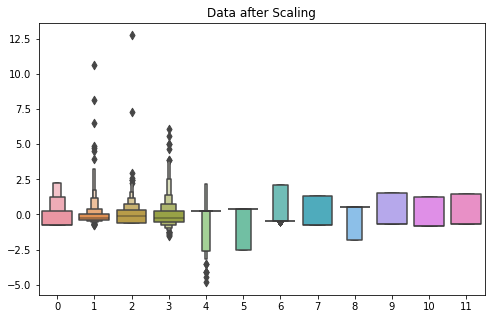

In [16]:
plt.figure(figsize=(8,5))
plt.title("Data after Scaling")
sns.boxenplot(data = X_train)
plt.show()

## Make the data balanced

In [17]:
# Adding randomized samples to the data as the data is imbalanced
from imblearn.over_sampling import RandomOverSampler

over_samp =  RandomOverSampler(random_state=0)
X_train_res, y_train_res = over_samp.fit_resample(X, y)
X_train_res.shape, y_train_res.shape

((812, 12), (812,))

In [18]:
y_train_res.value_counts()

1    406
0    406
Name: Loan_Status, dtype: int64

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size = 0.3, random_state = 42)
len(X_train), len(X_test)

(568, 244)

# 3. Modeling

To analyze the data, I developed various models to predict the response variable based on the independent variables, which is using the data of applicants to predict his/her loan status. The specific models I used are Logistic Regressio, K Neighbors Classifier, Decision Tree Classifier, Random Forest Classifier, Gradient Boosting Classifier and XGB Classifier. The code and results shows below, ans we can see the performances. 

## 3.1 Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver = 'lbfgs', max_iter=1000)
logisticRegr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [21]:
LogisticScore = logisticRegr.score(X_test,y_test)
print("Accuracy obtained by Logistic Regression model:",LogisticScore*100)

Accuracy obtained by Logistic Regression model: 71.72131147540983


## 3.2 KNN Classification

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [23]:
KNeighborsClassifierScore = knn.score(X_test, y_test)
print("Accuracy obtained by K Neighbors Classifier model:",KNeighborsClassifierScore*100)

Accuracy obtained by K Neighbors Classifier model: 61.065573770491795


## 3.3 Decision Tree Model

In [24]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [25]:
DecisionTreeClassifierScore = dtc.score(X_test,y_test)
print("Accuracy obtained by Decision Tree Classifier model:",DecisionTreeClassifierScore*100)

Accuracy obtained by Decision Tree Classifier model: 84.42622950819673


## 3.4 Random Forest Model

In [26]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [27]:
RandomForestClassifierScore = rfc.score(X_test, y_test)
print("Accuracy obtained by Random Forest Classifier model:",RandomForestClassifierScore*100)

Accuracy obtained by Random Forest Classifier model: 90.1639344262295


## 3.5 Gradient Boosting Classification

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [29]:
GradientBoostingClassifierScore = gb.score(X_test,y_test)
print("Accuracy obtained by Gradient Boosting Classifier model:",GradientBoostingClassifierScore*100)

Accuracy obtained by Gradient Boosting Classifier model: 82.37704918032787


## 3.6 XGB Classification

In [30]:
from xgboost import XGBClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# one-hot encode the categorical features
cat_attribs = ['Dependents', 'Credit_History', 'Gender', 'Married', 'Graduate', 'Rural', 'Semiurban', 'Urban']
full_pipeline = ColumnTransformer([('cat', OneHotEncoder(handle_unknown='ignore'), cat_attribs)], remainder='passthrough')
encoder = full_pipeline.fit(X_train)
X_train = encoder.transform(X_train)
X_test = encoder.transform(X_test)
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier()

In [31]:
XGBClassifierScore = xgb.score(X_test,y_test)
print("Accuracy obtained by XGB Classifier model:",XGBClassifierScore*100)

Accuracy obtained by XGB Classifier model: 84.8360655737705


# 4. Findings

Based on the output of the models, the main finding is that the random forest model has accuracy rate more than 90%, which is highest, and we can apply the models in real world. The findings are robust to different model specifications, since the loan status prediction has similar type of variables and data.

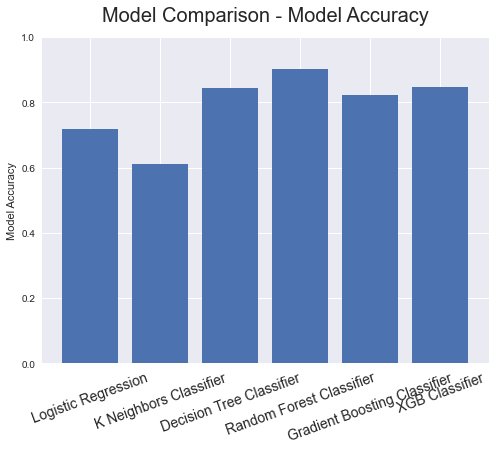

In [32]:
plt.style.use("seaborn")

x = ["Logistic Regression", 
     "K Neighbors Classifier",
     "Decision Tree Classifier", 
     "Random Forest Classifier",        
     "Gradient Boosting Classifier",
     "XGB Classifier"]

y_ = [LogisticScore, 
      KNeighborsClassifierScore, 
     DecisionTreeClassifierScore, 
     RandomForestClassifierScore,       
     GradientBoostingClassifierScore, 
     XGBClassifierScore]

fig, ax = plt.subplots(figsize=(8,6))
plt.bar(x,y_)
plt.ylabel("Model Accuracy")
plt.xticks(rotation=20, fontsize=14)
plt.title("Model Comparison - Model Accuracy", fontsize=20, y=1.03)
plt.ylim([0,1])
plt.show()

# 5. Conclusion

From the analysis, we can see the machine learning models are effective to predict loan status, and we need to realize the importance of credit history. In the future, the questions including how to predict applicants breach of contract, or how can one person improve the credit ability could be answered .

# 6. References

1. Data set source https://www.kaggle.com/datasets/shaimaa1234/loan-prediction-numerical-values
2. Hamid, Aboobyda Jafar, and Tarig Mohammed Ahmed. "Developing prediction model of loan risk in banks using data mining." Machine Learning and Applications: An International Journal 3.1 (2016): 1-9.
3. Arun, Kumar, Garg Ishan, and Kaur Sanmeet. "Loan approval prediction based on machine learning approach." IOSR J. Comput. Eng 18.3 (2016): 18-21.
4. Fati, Suliman Mohamed. "Machine Learning-Based Prediction Model for Loan Status Approval." Journal of Hunan University Natural Sciences 48.10 (2021).